### Importing the used libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train['sentence'['sentence'['sentence'_test_split
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MaiElBaradei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading the data

In [2]:
train = pd.read_csv('train_data.csv')
train.columns


Index(['sentence', 'sentiment'], dtype='object')

### Checking the values of sentiment

In [3]:
train['sentiment'].unique()

array([0, 1], dtype=int64)

### Cleaning data and removing stopwords

In [6]:
# Data Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

train['cleaned_text'] = train['sentence'].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
train['cleaned_text'] = train['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


In [7]:
train.head()

,sentence,sentiment,cleaned_text
0,awww that s a bummer you shoulda got david car...,0,awww bummer shoulda got david carr third day
1,is upset that he can t update his facebook by ...,0,upset update facebook texting might cry result...
2,i dived many times for the ball managed to sav...,0,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,0,whole body feels itchy like fire
4,no it s not behaving at all i m mad why am i h...,0,behaving mad see


### dropping un-processed sentences

In [10]:
train.drop(['sentence'], axis=1, inplace=True)

### Tokenizing and Padding

In [11]:
max_words = 20000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train['cleaned_text'])
sequences = tokenizer.texts_to_sequences(train['cleaned_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, train['sentiment'], test_size=0.2, random_state=42)


### Model Building

In [14]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print(model.summary())


c:\Users\MaiElBaradei\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Model Training

In [15]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/5
17145/17145 ━━━━━━━━━━━━━━━━━━━━ 1955s 114ms/step - accuracy: 0.7550 - loss: 0.4972 - val_accuracy: 0.7825 - val_loss: 0.4569
Epoch 2/5
17145/17145 ━━━━━━━━━━━━━━━━━━━━ 1929s 113ms/step - accuracy: 0.7897 - loss: 0.4466 - val_accuracy: 0.7849 - val_loss: 0.4526
Epoch 3/5
17145/17145 ━━━━━━━━━━━━━━━━━━━━ 1996s 116ms/step - accuracy: 0.7994 - loss: 0.4307 - val_accuracy: 0.7867 - val_loss: 0.4501
Epoch 4/5
17145/17145 ━━━━━━━━━━━━━━━━━━━━ 1943s 113ms/step - accuracy: 0.8052 - loss: 0.4202 - val_accuracy: 0.7868 - val_loss: 0.4552
Epoch 5/5
17145/17145 ━━━━━━━━━━━━━━━━━━━━ 1945s 113ms/step - accuracy: 0.8110 - loss: 0.4104 - val_accuracy: 0.7858 - val_loss: 0.4557


### Model Evaluation

9525/9525 ━━━━━━━━━━━━━━━━━━━━ 169s 18ms/step
              precision    recall  f1-score   support

           0       0.80      0.77      0.78    153092
           1       0.78      0.80      0.79    151703

    accuracy                           0.79    304795
   macro avg       0.79      0.79      0.79    304795
weighted avg       0.79      0.79      0.79    304795



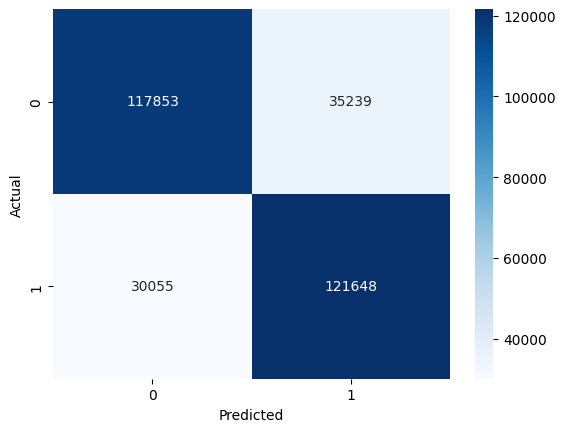

In [16]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Plot training & validation accuracy values to analyse the results

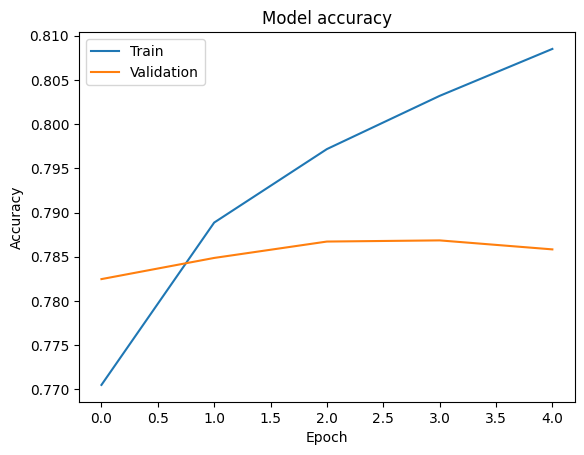

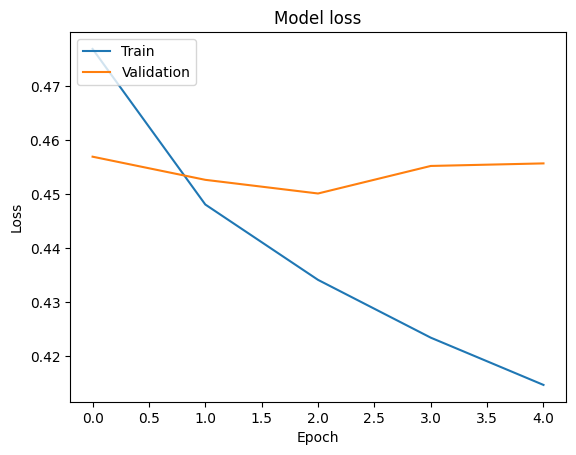

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
